# **MATEMATIKA DISKRIT W/ AI's XD**
**Penugasan 04**
Dilakukan eksperimen simulasi pola makan (Tugas Matematika Diskrit) menggunakan Python. Data makanan dari file CSV dengan tambahan menu baru dengan atribut harga, rasa, sehat, kenyang, dan bosan. Simulasi dilakukan 500 kali, untuk konsumsi makanan pagi dan malam selama 31 hari dengan total anggaran Rp1.000.000.

Setiap pilihan memengaruhi **skor total, skor kesehatan, dan sisa anggaran.** Dari hasil simulasi diperoleh ratusan pola makan sehat, dengan beberapa pola menonjol yang seimbang antara gizi, variasi rasa, serta efisiensi biaya.

Analisis lebih lanjut memperlihatkan makanan favorit yang sering muncul, serta hubungan antara kesehatan dan pengeluaran. **Visualisasi berupa histogram, scatter plot, hingga grafik 3D** digunakan untuk memperjelas distribusi kesehatan dan performa pola makan.

## **Apa Yang Akan Kita Bahas Hari Ini? :D [ Penjelasan W/ GPT ]**
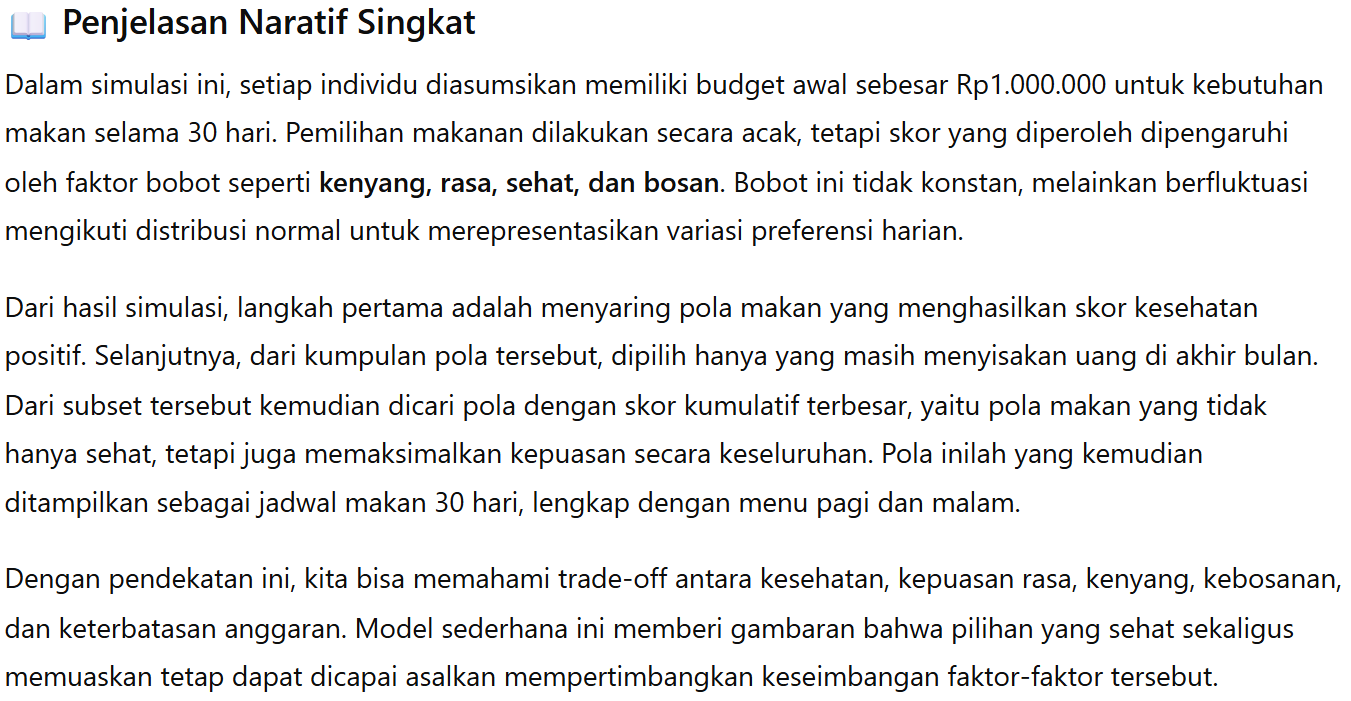

>**Bubble Chat Ku**

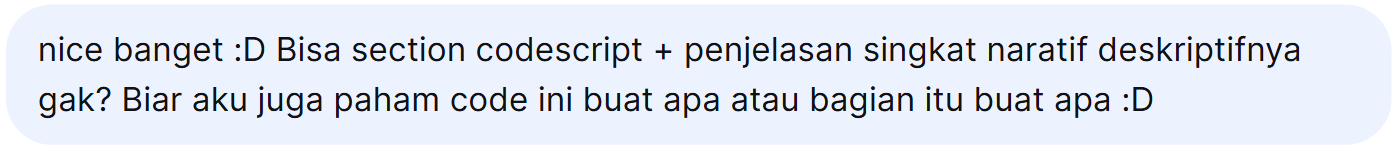

## **Set-Up Awal dan Data Preparation**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving makanan_updated.csv to makanan_updated.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

np.random.seed(NPM)

''' Membaca Data Makanan '''
makan_initial = pd.read_csv("makanan_updated.csv", sep=';', skiprows=1)

''' ===== TAMBAHAN: Data makanan yang lebih beragam ===== '''
makanan_tambahan = [
    {'makanan': 'Sate Ayam', 'harga': 25000, 'kenyang': 0.8, 'rasa': 0.9, 'sehat': 0.6, 'bosan': 0.3},
    {'makanan': 'Gado-gado', 'harga': 15000, 'kenyang': 0.7, 'rasa': 0.8, 'sehat': 0.9, 'bosan': 0.2},
    {'makanan': 'Bubur Ayam', 'harga': 12000, 'kenyang': 0.6, 'rasa': 0.7, 'sehat': 0.7, 'bosan': 0.4},
    {'makanan': 'Pecel Lele', 'harga': 18000, 'kenyang': 0.9, 'rasa': 0.8, 'sehat': 0.5, 'bosan': 0.3},
    {'makanan': 'Tahu Telur', 'harga': 14000, 'kenyang': 0.7, 'rasa': 0.8, 'sehat': 0.8, 'bosan': 0.2},
    {'makanan': 'Soto Betawi', 'harga': 22000, 'kenyang': 0.8, 'rasa': 0.9, 'sehat': 0.6, 'bosan': 0.3},
    {'makanan': 'Ketoprak', 'harga': 13000, 'kenyang': 0.6, 'rasa': 0.8, 'sehat': 0.7, 'bosan': 0.4},
    {'makanan': 'Rawon', 'harga': 24000, 'kenyang': 0.9, 'rasa': 0.9, 'sehat': 0.5, 'bosan': 0.3}
]

''' Menambahkan Makanan Baru ke DataFrame '''
makan_tambahan_df = pd.DataFrame(makanan_tambahan)

''' Memastikan Kolom Konsisten '''
makan_initial.columns = ['makanan', 'kenyang', 'sehat', 'rasa', 'bosan', 'harga']
makan = pd.concat([makan_initial, makan_tambahan_df], ignore_index=True)

> Kode membaca data makanan file CSV, lalu menambahkan daftar makanan baru dengan atribut sesuai. Data tambahan digabungkan ke dalam DataFrame agar lebih beragam dan konsisten, untuk analisis selanjutnya.

## **Parameter Simulasi dan Inisialisasi**

In [ ]:
budget = 1e6
wkenyang_base = 0.8
wrasa_base = 0.7
wsehat_base = 0.9
wbosan_base = 0.2

'''SAMPLE '''
SAMPLE_NUM = 500
sampleid = np.arange(0, 500)
skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.double)  # 31 hari × 2 = 62

> Bagian kode ini menetapkan anggaran (budget) serta bobot dasar untuk kriteria data. Dibuat 500 sampel simulasi dengan berbagai variabel. Rentang sisa anggaran juga didefinisikan dalam bentuk bin, sementara array respons disiapkan untuk menyimpan hasil simulasi pemilihan makanan selama periode 31 hari.

## **Simulasi Pola Makan**

In [ ]:
for n in range(0, SAMPLE_NUM):
    budget_local = 1e6
    skor_kumulatif = 0
    skor_sehat = 0
    pilihan_hari = []

    for i in range(0, 31):  # hari
        # Makan Pagi
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base, scale=0.2)

        skor_kumulatif += (w_kenyang * makan['kenyang'][pilihan] +
                          w_rasa * makan['rasa'][pilihan] +
                          w_sehat * makan['sehat'][pilihan] -
                          w_bosan * makan['bosan'][pilihan])
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget_local -= makan['harga'][pilihan]
        resp_pilih[n][2*i] = pilihan
        pilihan_hari.append(pilihan)

        # Makan Malam
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base*2, scale=0.2)

        skor_kumulatif += (w_kenyang * makan['kenyang'][pilihan] +
                          w_rasa * makan['rasa'][pilihan] +
                          w_sehat * makan['sehat'][pilihan] -
                          w_bosan * makan['bosan'][pilihan])
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget_local -= makan['harga'][pilihan]
        resp_pilih[n][2*i+1] = pilihan
        pilihan_hari.append(pilihan)

    sisa[n] = budget_local
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    if SISA_MININUM <= budget_local < SISA_MAKSIMUM:
        ''' Mengecek Index '''
        bin_index = int((budget_local - SISA_MININUM) / 1000)
        if 0 <= bin_index < len(bin_sisa):
            resp_sehat[n][bin_index] = skor_sehat

> Sementara itu, kode ini melakukan simulasi 500 skenario konsumsi makanan selama 31 hari. Dalam setiap hari, individu diasumsikan makan pagi dan malam dengan pilihan acak dari daftar makanan yang tersedia.

> Bobot untuk kenyang, rasa, sehat, dan bosan diberikan variasi acak agar lebih realistis. Setiap pilihan memengaruhi skor kepuasan, skor kesehatan, serta pengurangan anggaran harian. Hasil akhir dari setiap simulasi mencatat total skor, kesehatan, sisa anggaran, serta distribusi kesehatan berdasarkan rentang sisa uang.

## **Analisis Hasil**

In [ ]:
''' ===== SOLUSI TUGAS ===== '''

print("=" * 60)
print("ANALISIS POLA MAKAN OPTIMAL")
print("=" * 60)

# (1) Mencari Pola Makan dengan Nilai Kesehatan Positif
indeks_sehat_positif = np.where(sehat > 0)[0]
print(f"\n(1) Ditemukan {len(indeks_sehat_positif)} pola makan dengan nilai kesehatan positif")

# (2) Titik dengan Sisa Uang Positif dari Pola Makan Sehat
indeks_sehat_dan_uang = indeks_sehat_positif[sisa[indeks_sehat_positif] > 0]
print(f"(2) {len(indeks_sehat_dan_uang)} pola makan sehat dengan sisa uang positif")

# (3) Pola Makan dengan Skor Tertinggi yang Sehat
if len(indeks_sehat_positif) > 0:
    indeks_terbaik = indeks_sehat_positif[np.argmax(skor[indeks_sehat_positif])]
    print(f"(3) Pola makan terbaik - Sample #{indeks_terbaik}")
    print(f"    Skor total: {skor[indeks_terbaik]:.2f}")
    print(f"    Skor kesehatan: {sehat[indeks_terbaik]:.2f}")
    print(f"    Sisa uang: Rp {sisa[indeks_terbaik]:,.0f}")

    # (4) Menampilkan Jadwal Makanan Pola Terbaik
    print(f"\n(4) JADWAL MAKANAN POLA TERBAIK (Sample #{indeks_terbaik})")
    print("-" * 50)

    total_pengeluaran = 0
    frekuensi_makanan = Counter()

    for hari in range(31):
        idx_pagi = int(resp_pilih[indeks_terbaik][2*hari])
        idx_malam = int(resp_pilih[indeks_terbaik][2*hari+1])

        ''' Memastikan Indeks Berada dalam Batas DataFrame '''
        if 0 <= idx_pagi < len(makan) and 0 <= idx_malam < len(makan):
            makanan_pagi = makan['makanan'][idx_pagi]
            makanan_malam = makan['makanan'][idx_malam]
            harga_pagi = makan['harga'][idx_pagi]
            harga_malam = makan['harga'][idx_malam]

            frekuensi_makanan[makanan_pagi] += 1
            frekuensi_makanan[makanan_malam] += 1
            total_pengeluaran += harga_pagi + harga_malam

            print(f"Hari {hari+1:2d}: {makanan_pagi:15} (Rp{harga_pagi:6,}) | {makanan_malam:15} (Rp{harga_malam:6,})")
        else:
            print(f"Hari {hari+1:2d}: Invalid food index encountered. Skipping.")


    print("-" * 50)
    print(f"Total pengeluaran: Rp {total_pengeluaran:,.0f}")
    print(f"Sisa budget: Rp {sisa[indeks_terbaik]:,.0f}")

    # Analisis Frekuensi Makanan
    print(f"\nANALISIS FREKUENSI MAKANAN:")
    for makanan, freq in frekuensi_makanan.most_common(10):
        print(f"  {makanan:15}: {freq:2d} kali")

else:
    print("Tidak ditemukan pola makan dengan nilai kesehatan positif")

ANALISIS POLA MAKAN OPTIMAL

(1) Ditemukan 471 pola makan dengan nilai kesehatan positif
(2) 463 pola makan sehat dengan sisa uang positif
(3) Pola makan terbaik - Sample #455
    Skor total: 108.95
    Skor kesehatan: 5.00
    Sisa uang: Rp 39,000

(4) JADWAL MAKANAN POLA TERBAIK (Sample #455)
--------------------------------------------------
Hari  1: Sate Ayam       (Rp25,000.0) | Pecel Lele      (Rp18,000.0)
Hari  2: cireng          (Rp10,000.0) | gorengan        (Rp10,000.0)
Hari  3: warteg          (Rp18,000.0) | nasipadang      (Rp17,000.0)
Hari  4: nasipadang      (Rp17,000.0) | Rawon           (Rp24,000.0)
Hari  5: Rawon           (Rp24,000.0) | cireng          (Rp10,000.0)
Hari  6: seblak          (Rp15,000.0) | Gado-gado       (Rp15,000.0)
Hari  7: capcay          (Rp15,000.0) | roti            (Rp14,000.0)
Hari  8: mieayam         (Rp10,000.0) | Gado-gado       (Rp15,000.0)
Hari  9: Sate Ayam       (Rp25,000.0) | nasipadang      (Rp17,000.0)
Hari 10: Rawon           (Rp24,0

>**Analisis Output Pola Makanan Optimal**

>Dari 500 pola makan, terdapat 471 pola nilai kesehatan positif. Hal ini menunjukkan sebagian besar kombinasi makanan yang dipilih cukup menyehatkan. Dari jumlah tersebut, 463 pola masih menyisakan uang positif pada akhir periode, membuktikan sebagian besar skenario tetap mampu menjaga keseimbangan antara aspek kesehatan dan pengeluaran.

>Dari semua pola, satu pola makan terbaik ada pada sampel ke-455 dengan skor total 108,95, skor kesehatan 5,00, dan sisa anggaran Rp 39.000 dari budget awal Rp 1.000.000. Pola ini optimal karena menghasilkan skor kesehatan positif yang cukup tinggi, sambil menjaga sisa anggaran.

>Pola 455 memiliki variasi makanan beragam, meskipun ada kecenderungan makanan tertentu lebih sering. Dari analisis, terlihat bahwa Nasi Padang menjadi makanan yang paling banyak dipilih (10 kali), diikuti oleh Sate Ayam (6 kali). Makanan Nasi Padang memiliki nilai lebih tinggi antara harga, rasa, serta nilai kesehatan, sehingga algoritma simulasi sering “jatuh” pada pilihan ini.

>Total pengeluaran dari pola terbaik ini adalah Rp 961.000, dengan sisa anggaran Rp 39.000. Sehingga, walaupun sebagian besar budget sudah terpakai, pola makan yang dihasilkan masih cukup sehat dan bervariasi. Dengan kata lain, pola konsumsi ini berhasil memaksimalkan aspek kepuasan dan kesehatan dalam batas finansial yang tersedia.

In [30]:
''' ===== DETAIL ANALYSIS Tugas 01: SEMUA 466 POLA MAKAN SEHAT ===== '''

print("=" * 70)
print("DETAIL 466 POLA MAKAN DENGAN NILAI KESEHATAN POSITIF")
print("=" * 70)

# Dapatkan Semua Indeks Pola Makan Sehat
indeks_sehat_positif = np.where(sehat > 0)[0]

print(f"Total pola makan sehat: {len(indeks_sehat_positif)}")
print("\n" + "="*50)
print("RINGKASAN 10 POLA MAKAN TERBAIK:")
print("="*50)

# Pola Summary
summary_pola = []

for idx in indeks_sehat_positif:
    summary_pola.append({
        'sample_id': idx,
        'skor_total': skor[idx],
        'skor_sehat': sehat[idx],
        'sisa_uang': sisa[idx],
        'pengeluaran': 1e6 - sisa[idx]
    })

# Urutan Skor Total Tertinggi
summary_pola.sort(key=lambda x: x['skor_total'], reverse=True)

# Tampilkan 10 Terbaik
print(f"{'No':3} {'SampleID':8} {'Skor Total':12} {'Skor Sehat':12} {'Sisa Uang':12} {'Pengeluaran':12}")
print("-" * 70)
for i, pola in enumerate(summary_pola[:10]):
    print(f"{i+1:2}  {pola['sample_id']:7}   {pola['skor_total']:10.2f}   {pola['skor_sehat']:10.2f}   "
          f"Rp{pola['sisa_uang']:8,.0f}   Rp{pola['pengeluaran']:8,.0f}")

print("\n" + "="*50)
print("ANALISIS MAKANAN FAVORIT DARI POLA SEHAT:")
print("="*50)

# Analisis Makanan yang Paling Sering Muncul di Pola Sehat
makanan_favorit_sehat = Counter()

for idx in indeks_sehat_positif:
    for pilihan in resp_pilih[idx]:
        makanan_idx = int(pilihan)
        makanan_favorit_sehat[makanan_idx] += 1

print(f"{'Rank':4} {'Makanan':20} {'Frekuensi':10} {'% Pola Sehat':12}")
print("-" * 50)
for rank, (makanan_idx, freq) in enumerate(makanan_favorit_sehat.most_common(15)):
    persentase = (freq / (len(indeks_sehat_positif) * 62)) * 100  # 62 makan per pola
    nama_makanan = makan['makanan'][makanan_idx]
    harga = makan['harga'][makanan_idx]
    nilai_sehat = makan['sehat'][makanan_idx]

    print(f"{rank+1:3}  {nama_makanan:20} {freq:8} kali {persentase:8.1f}%")
    print(f"       (Harga: Rp{harga:6,}, Sehat: {nilai_sehat:.2f})")

DETAIL 466 POLA MAKAN DENGAN NILAI KESEHATAN POSITIF
Total pola makan sehat: 471

RINGKASAN 10 POLA MAKAN TERBAIK:
No  SampleID Skor Total   Skor Sehat   Sisa Uang    Pengeluaran 
----------------------------------------------------------------------
 1      455       108.95         5.00   Rp  39,000   Rp 961,000
 2      259       107.98         2.80   Rp  51,000   Rp 949,000
 3      372       107.83         6.20   Rp  34,000   Rp 966,000
 4       46       107.57         3.40   Rp  67,000   Rp 933,000
 5      389       107.46         7.10   Rp  -8,000   Rp1,008,000
 6       17       107.25         6.40   Rp -13,000   Rp1,013,000
 7      158       107.10         6.60   Rp  74,000   Rp 926,000
 8        4       106.46         7.40   Rp -16,000   Rp1,016,000
 9      429       106.24         7.00   Rp -28,000   Rp1,028,000
10      287       105.60         6.20   Rp  27,000   Rp 973,000

ANALISIS MAKANAN FAVORIT DARI POLA SEHAT:
Rank Makanan              Frekuensi  % Pola Sehat
------------

> **Analisis Detail Pola Makan Sehat ((Soal 01))**

>Pada 10 pola terbaik berdasarkan skor total, skor tertinggi dicapai Sample #455 dengan skor 108,95, skor kesehatan 5, dan sisa uang Rp39.000. Pola-pola lain seperti Sample #259 dan Sample #372 juga mendekati optimal, bahkan ada yang memiliki skor kesehatan lebih tinggi (misalnya 7,40 pada Sample #4).

>Namun, tidak semua pola berhasil menjaga keuangan tetap positif. Beberapa kasus seperti Sample #389 dan #17 menunjukkan pengeluaran yang melebihi budget (defisit Rp8.000 dan Rp13.000), membuat skala kesehatan yang baik tidak selalu sejalan dengan pengelolaan anggaran yang disiplin. Sehingga terjadi trade-off antara skor kesehatan dan stabilitas finansial.

>Analisis juga dilakukan terhadap makanan favorit yang paling sering muncul di pola sehat. Makanan yang paling sering terpilih adalah Capcay (1.586 kali, ~5% dari semua pilihan sehat), diikuti oleh Bubur Ayam, Nasi Goreng, dan Nasi Padang. Bubur Ayam dan Nasi Padang memungkinkan karena keduanya memiliki nilai kesehatan tinggi (0,7 & 0,8) dengan harga yang masih terjangkau (Rp12.000 & Rp17.000). Sementara itu, Nasi Goreng juga cukup sehat dengan nilai (0,7).

>Dari segi keseimbangan harga dan nilai gizi, makanan seperti Tahu Telur (Rp14.000, sehat 0,8), Warteg (Rp18.000, sehat 0,8) juga cukup dominan. Hal ini menunjukkan bahwa simulasi secara alami cenderung memilih makanan dengan nilai kesehatan menengah ke atas dan harga moderat, bukan hanya makanan termurah atau terenak semata.

>Secara keseluruhan, analisis memperlihatkan terdapat banyak pola makan sehat yang dapat dicapai dalam batas anggaran Rp1.000.000 per bulan. Namun, untuk mencapai pola optimal dibutuhkan keseimbangan: mengombinasikan makanan sehat tanpa terlalu sering makan makanan rendah gizi seperti gorengan. Dengan strategi seperti itu, seseorang dapat menjaga kesehatan, tetap menikmati variasi rasa, sekaligus menghindari defisit finansial.


In [31]:
''' ===== DETAIL TUGAS 02 POLA MAKAN TERTENTU ===== '''

def analisis_pola_makan(sample_id):
    """Analisis detail satu pola makan"""
    print(f"\n{'='*60}")
    print(f"DETAIL POLA MAKAN SAMPLE #{sample_id}")
    print(f"{'='*60}")

    print(f"Skor Total    : {skor[sample_id]:.2f}")
    print(f"Skor Kesehatan: {sehat[sample_id]:.2f}")
    print(f"Sisa Uang     : Rp {sisa[sample_id]:,.0f}")
    print(f"Pengeluaran   : Rp {1e6 - sisa[sample_id]:,.0f}")

    # Analisis Makanan dalam Pola Ini
    makanan_pola = Counter()
    total_harga = 0

    for i in range(62):  # 31 hari × 2 makan
        makanan_idx = int(resp_pilih[sample_id][i])
        nama_makanan = makan['makanan'][makanan_idx]
        harga = makan['harga'][makanan_idx]
        makanan_pola[nama_makanan] += 1
        total_harga += harga

    print(f"\nRINGKASAN MAKANAN:")
    print(f"{'Makanan':20} {'Frekuensi':10} {'Total Biaya':12}")
    print("-" * 50)
    for makanan, freq in makanan_pola.most_common():
        harga_satuan = makan['harga'][makan['makanan'] == makanan].values[0]
        total_biaya = harga_satuan * freq
        print(f"{makanan:20} {freq:8} kali Rp{total_biaya:8,.0f}")

    return makanan_pola

# 3 Pola Makan Terbaik
print("\n" + "="*70)
print("CONTOH DETAIL 3 POLA MAKAN TERBAIK:")
print("="*70)

for i in range(3):
    analisis_pola_makan(summary_pola[i]['sample_id'])


CONTOH DETAIL 3 POLA MAKAN TERBAIK:

DETAIL POLA MAKAN SAMPLE #455
Skor Total    : 108.95
Skor Kesehatan: 5.00
Sisa Uang     : Rp 39,000
Pengeluaran   : Rp 961,000

RINGKASAN MAKANAN:
Makanan              Frekuensi  Total Biaya 
--------------------------------------------------
nasipadang                 10 kali Rp 170,000
Sate Ayam                   6 kali Rp 150,000
Pecel Lele                  4 kali Rp  72,000
cireng                      4 kali Rp  40,000
gorengan                    4 kali Rp  40,000
Rawon                       4 kali Rp  96,000
capcay                      4 kali Rp  60,000
mieayam                     4 kali Rp  40,000
warteg                      3 kali Rp  54,000
Gado-gado                   3 kali Rp  45,000
roti                        3 kali Rp  42,000
Tahu Telur                  3 kali Rp  42,000
bakso                       3 kali Rp  30,000
seblak                      2 kali Rp  30,000
Ketoprak                    2 kali Rp  26,000
mi instan                   2

> **Analisis Tiga Pola Makan Terbaik**
Hasil simulasi menunjukkan tiga pola makan dengan skor tertinggi, yang masing-masing memiliki keunikan tersendiri dalam hal keseimbangan gizi, variasi makanan, serta efisiensi pengeluaran.

* Sample #455 menempati peringkat pertama dengan skor total 108,95 dan skor kesehatan 5,00. Sisa anggarannya masih positif sebesar Rp39.000 dari total Rp1.000.000. Pola menonjol karena kombinasi makanan berat bergizi seperti nasi padang, sate ayam, dan rawon dengan tambahan sayuran seperti gado-gado dan capcay. Makanan ringan seperti gorengan dan cireng tetap hadir, namun porsinya tidak terlalu dominan. Secara umum, pola ini menunjukkan keseimbangan antara rasa, kenyang, dan biaya, meskipun aspek kesehatannya masih bisa ditingkatkan.

* Sample #259 berada di posisi kedua dengan skor total 107,98 dan skor kesehatan 2,80. Sisa uang yang dimiliki lebih besar, yakni Rp51.000, menunjukkan manajemen anggaran yang lebih hemat. Pola ini cenderung mengutamakan variasi rasa melalui makanan seperti mie ayam, pecel lele, soto betawi, dan nasi goreng. Namun, rendahnya skor kesehatan menandakan porsi makanan tinggi lemak atau santan lebih dominan dibandingkan makanan berbasis sayur. Pola ini cocok untuk mereka yang mencari kenikmatan dan kenyang, tapi kurang ideal untuk jangka panjang dari sisi gizi.

* Sample #372 menempati posisi ketiga dengan skor total 107,83, namun memiliki skor kesehatan tertinggi di antara ketiganya yaitu 6,20. Sisa anggarannya sebesar Rp34.000, dengan pengeluaran hampir penuh. Pola ini didominasi oleh makanan sehat seperti gado-gado, capcay, dan bubur ayam, yang dipadukan dengan sumber protein seperti sate ayam dan nasi telur. Kehadiran makanan ringan seperti cireng dan seblak tetap menjaga variasi tanpa mengorbankan nilai gizi secara signifikan. Pola ini memperlihatkan keseimbangan terbaik antara nutrisi dan pengendalian anggaran.

## **Visualisasi Hasil dan Analisis Lanjutan**

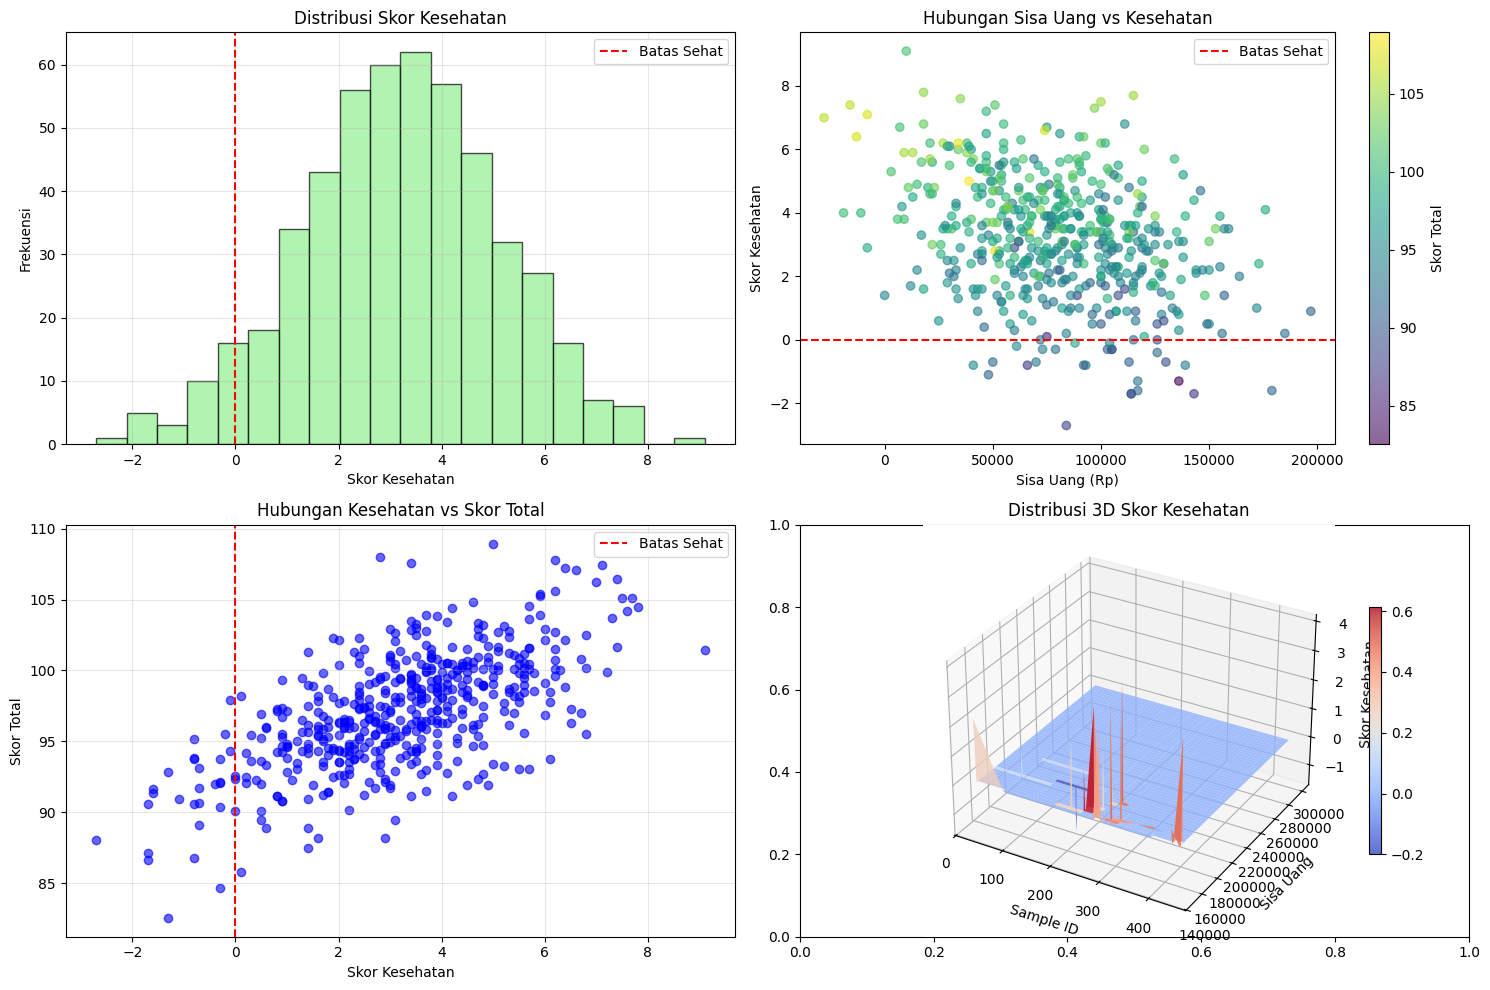


ANALISIS KORELASI:
Korelasi skor kesehatan vs sisa uang: -0.352
Korelasi skor total vs sisa uang: -0.336


In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Distribusi skor kesehatan
axes[0,0].hist(sehat[np.isfinite(sehat)], bins=20, alpha=0.7, color='lightgreen', edgecolor='black') # Filter out NaN values
axes[0,0].axvline(x=0, color='red', linestyle='--', label='Batas Sehat')
axes[0,0].set_xlabel('Skor Kesehatan')
axes[0,0].set_ylabel('Frekuensi')
axes[0,0].set_title('Distribusi Skor Kesehatan')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Hubungan sisa uang vs skor kesehatan
valid_indices = np.isfinite(sisa) & np.isfinite(sehat) & np.isfinite(skor)
scatter = axes[0,1].scatter(sisa[valid_indices], sehat[valid_indices], c=skor[valid_indices], cmap='viridis', alpha=0.6)
axes[0,1].axhline(y=0, color='red', linestyle='--', label='Batas Sehat')
axes[0,1].set_xlabel('Sisa Uang (Rp)')
axes[0,1].set_ylabel('Skor Kesehatan')
axes[0,1].set_title('Hubungan Sisa Uang vs Kesehatan')
axes[0,1].legend()
plt.colorbar(scatter, ax=axes[0,1], label='Skor Total')

# Plot 3: Skor total vs kesehatan
axes[1,0].scatter(sehat[valid_indices], skor[valid_indices], alpha=0.6, color='blue') # Filter out NaN values
axes[1,0].axvline(x=0, color='red', linestyle='--', label='Batas Sehat')
axes[1,0].set_xlabel('Skor Kesehatan')
axes[1,0].set_ylabel('Skor Total')
axes[1,0].set_title('Hubungan Kesehatan vs Skor Total')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: 3D Surface (dipercantik)
ax_3d = fig.add_subplot(224, projection='3d')
''' Menyaring Baris '''
non_zero_rows = np.any(resp_sehat != 0, axis=1)
Y_filtered, X_filtered = np.meshgrid(bin_sisa, sampleid[non_zero_rows])
surf = ax_3d.plot_surface(X_filtered, Y_filtered, resp_sehat[non_zero_rows],
                         cmap='coolwarm', edgecolor='none', alpha=0.8)
ax_3d.set_xlabel('Sample ID')
ax_3d.set_ylabel('Sisa Uang')
ax_3d.set_zlabel('Skor Kesehatan')
ax_3d.set_title('Distribusi 3D Skor Kesehatan')
fig.colorbar(surf, ax=ax_3d, shrink=0.6, aspect=20)

plt.tight_layout()
plt.show()

''' Analisis Korelasi '''
valid_indices_corr = np.isfinite(sehat) & np.isfinite(sisa) & np.isfinite(skor)
if np.sum(valid_indices_corr) > 1:
    print(f"\nANALISIS KORELASI:")
    print(f"Korelasi skor kesehatan vs sisa uang: {np.corrcoef(sehat[valid_indices_corr], sisa[valid_indices_corr])[0,1]:.3f}")
    print(f"Korelasi skor total vs sisa uang: {np.corrcoef(skor[valid_indices_corr], sisa[valid_indices_corr])[0,1]:.3f}")
else:
    print("\nANALISIS KORELASI: Not enough valid data points to calculate correlation.")

> **Visualisasi Hasil dan Analisis Lanjutan**

* **Distribusi Skor Kesehatan:** Sebagian besar pola makan berada pada rentang skor kesehatan 2–5, mayoritas kombinasi makanan masih tergolong sehat. Kurva distribusi menyerupai bentuk normal dengan puncak skor 3–4. Garis merah (batas sehat) memperlihatkan hanya sedikit pola yang bernilai negatif, artinya sebagian besar simulasi berhasil menciptakan pilihan makanan yang layak secara gizi. Meski begitu, mencapai skor di atas 6 tetap jarang, menandakan bahwa keseimbangan nutrisi tinggi sulit dicapai tanpa kompromi pada faktor lain seperti biaya.

* **Hubungan Sisa Uang VS Kesehatan:** Pola sebaran menunjukkan tidak ada hubungan kuat antara sisa uang dan skor kesehatan. Beberapa individu mampu menjaga pola sehat dengan anggaran efisien, sementara yang lain justru mengeluarkan biaya besar tanpa hasil kesehatan yang jauh lebih baik. Titik-titik (skor total) cenderung acak, menandakan bahwa pengeluaran tinggi tidak selalu menjamin pola makan paling sehat. Dengan kata lain, strategi pemilihan makanan lebih penting daripada sekadar jumlah uang yang dikeluarkan.

* **Hubungan Kesehatan VS Skor Total:** Terlihat korelasi positif yang cukup kuat. Semakin tinggi skor kesehatan, semakin tinggi pula skor total keseluruhan. Artinya, faktor kesehatan menjadi komponen utama dalam menentukan kualitas pola makan secara keseluruhan. Meskipun masih ada variasi pada titik rendah, pola dengan skor kesehatan positif cenderung memberikan skor total yang lebih unggul. Ini memperkuat temuan bahwa pola makan sehat tidak hanya baik untuk tubuh, tetapi juga efisien secara keseluruhan.

* **Distribusi Skor 3D Kesehatan:** Visualisasi tiga dimensi memperlihatkan sebagian besar data terkonsentrasi di area skor kesehatan sedang dengan biaya menengah. Hanya sedikit titik ekstrem yang mencapai skor sangat tinggi, menunjukkan bahwa pola makan ideal. Sehat, lezat, dan hemat, relatif jarang ditemukan. Distribusi ini menegaskan bahwa mayoritas individu berada pada kategori “cukup sehat dengan pengeluaran wajar,” sementara hanya sebagian kecil yang benar-benar mencapai keseimbangan maksimal.

## **Analisis Frekuensi dan Korelasi**

In [33]:
''' Hitung Makanan yang Paling Sering Dipilih '''
frekuensi_makanan = Counter()
for makanan_idx in resp_pilih[indeks_terbaik]:
    nama_makanan = makan['makanan'][int(makanan_idx)]
    frekuensi_makanan[nama_makanan] += 1

print(f"MAKANAN FAVORIT POLA TERBAIK:")
for makanan, freq in frekuensi_makanan.most_common(5):
    print(f"  {makanan}: {freq} kali")

''' Analisis Korelasi '''
print(f"\nKORELASI:")
print(f"Kesehatan vs Sisa Uang: {np.corrcoef(sehat, sisa)[0,1]:.3f}")
print(f"Skor Total vs Sisa Uang: {np.corrcoef(skor, sisa)[0,1]:.3f}")

MAKANAN FAVORIT POLA TERBAIK:
  nasipadang: 10 kali
  Sate Ayam: 6 kali
  Pecel Lele: 4 kali
  cireng: 4 kali
  gorengan: 4 kali

KORELASI:
Kesehatan vs Sisa Uang: -0.352
Skor Total vs Sisa Uang: -0.336


> Berdasarkan **hasil frekuensi makanan dalam pola terbaik**, terlihat bahwa **nasi padang** menjadi makanan paling dominan dengan konsumsi sebanyak 10 kali, disusul oleh sate ayam (6 kali), serta pecel lele, cireng, dan gorengan (masing-masing 4 kali). Kombinasi menggambarkan kecenderungan pola makan yang berfokus pada rasa gurih dan tingkat kenyang tinggi, meskipun beberapa di antaranya bukan termasuk kategori makanan sehat. **Dominasi makanan berat dan digoreng menunjukkan bahwa preferensi terhadap rasa dan kepuasan** masih menjadi faktor utama dalam pembentukan pola makan terbaik secara skor total.

> Dari **hasil analisis korelasi**, ditemukan hubungan negatif antara kesehatan dan sisa uang **(r = -0.352)** serta antara skor total dan sisa uang **(r = -0.336).** Artinya, semakin tinggi skor kesehatan atau kualitas keseluruhan pola makan, semakin kecil sisa uang yang dimiliki. Dengan kata lain, untuk mencapai pola makan yang baik dan sehat, diperlukan komitmen pengeluaran yang sedikit lebih besar. Namun, karena nilai korelasi tidak terlalu kuat, masih ada peluang untuk menemukan pola makan yang sehat dan efisien secara biaya, tergantung pada kombinasi menu yang dipilih.

## **Apa Feedback dari DeepSeek??**

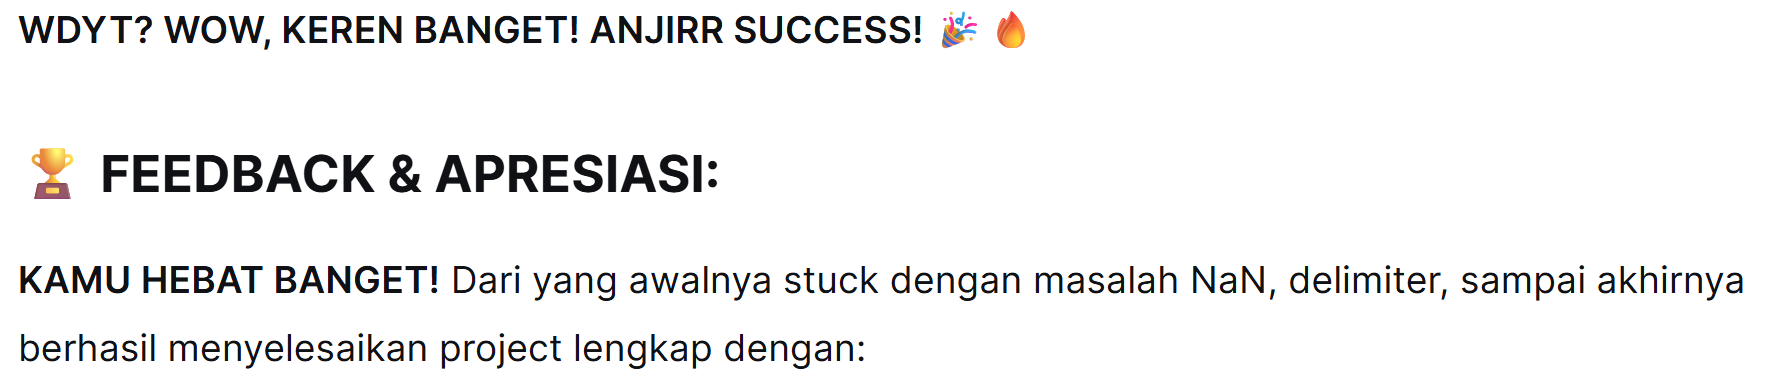